# 1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

## 파이토치 시작하기

In [29]:
import torch

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두 개 만들고 행으로 병합, 열로 병합


In [30]:
X=torch.rand(4,3)
Y=torch.rand(4,3)

# 행으로 병합 코드
print(torch.cat((X,Y),dim=0))
# 열로 병합 코드
print(torch.cat((X,Y),dim=1))

tensor([[0.3235, 0.4877, 0.5082],
        [0.7304, 0.0831, 0.0605],
        [0.1445, 0.6650, 0.2425],
        [0.6839, 0.6015, 0.5135],
        [0.9442, 0.9564, 0.6131],
        [0.2637, 0.2009, 0.5841],
        [0.5997, 0.3594, 0.7820],
        [0.4425, 0.2902, 0.7794]])
tensor([[0.3235, 0.4877, 0.5082, 0.9442, 0.9564, 0.6131],
        [0.7304, 0.0831, 0.0605, 0.2637, 0.2009, 0.5841],
        [0.1445, 0.6650, 0.2425, 0.5997, 0.3594, 0.7820],
        [0.6839, 0.6015, 0.5135, 0.4425, 0.2902, 0.7794]])


### Linear Regression Implementation from Scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [31]:
!pip install d2l # d2l 라이브러리에서 제공하는 기능 사용 위함

In [32]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [33]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)

In [34]:
print('features:', features,'\nlabel:', labels)

features: tensor([[-2.6400, -0.8079],
        [ 0.3378,  0.6929],
        [ 0.3719,  0.8582],
        ...,
        [-0.4577, -0.3799],
        [ 0.8988,  1.8627],
        [ 0.8087, -0.7685]]) 
label: tensor([[-1.2260],
        [ 5.4794],
        [ 5.3264],
        ...,
        [ 4.7119],
        [ 5.3857],
        [ 9.0852]])


In [35]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
     ###반복문으로 채워넣기:
    for i in range(0,len(indices),batch_size):
        ##이하는 반복문에 대한 조건입니다.
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [36]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.1178, -1.8660],
        [-1.0856,  0.8849],
        [ 0.1591,  2.8204],
        [-1.7783,  1.0611],
        [ 0.6481, -0.8975],
        [-1.0687, -0.3972],
        [ 0.4668,  0.2570],
        [-0.6665, -1.0357],
        [-0.3528,  0.8445],
        [-0.3899, -0.0650],
        [-0.3442,  0.3287],
        [ 0.1906,  0.4988],
        [ 1.1325,  0.7533],
        [-0.0695, -2.3427],
        [-1.3639,  1.2364],
        [-0.1006, -0.2823],
        [ 0.6909,  0.7723],
        [-0.0416,  0.8561],
        [ 0.8896,  0.3329],
        [ 1.8473, -0.8961]]) 
 tensor([[ 7.9515],
        [ 0.9022],
        [ 1.7496],
        [-1.4327],
        [ 8.7887],
        [ 2.8845],
        [ 6.5091],
        [ 5.0470],
        [ 3.1856],
        [ 4.4405],
        [ 3.9568],
        [ 5.3151],
        [ 7.7645],
        [ 8.8190],
        [-0.4324],
        [ 5.6155],
        [ 6.4360],
        [ 4.1055],
        [ 7.6766],
        [12.3926]])


In [37]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.tensor([0.0], requires_grad=True)#원하는 실수를 넣어주세요

In [38]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X,w)+b###lr func 코드 완성하기

In [39]:
def squared_loss(y_hat, y):
    """Squared loss."""
    torch.reshape(y,y_hat.shape)
    l = (y_hat - y) ** 2
    return l.mean()###loss function 직접 짜보기

In [40]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        ###반복문으로 채워넣기
        for param in params:
          param -= lr * param.grad / batch_size
          param.grad.zero_()


In [41]:
lr = 0.02 ###직접 설정
num_epochs = 20 ###직접 설정
net = linreg###위에서 가져오기
loss = squared_loss###위에서 가져오기
w1_x = []
w2_x = []
loss_y = []

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X,w,b),y)
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

        w1_x.append(w[0].clone().numpy())
        w2_x.append(w[1].clone().numpy())
        loss_y.append(train_l.mean().numpy())

epoch 1, loss 28.481192
epoch 2, loss 18.737978
epoch 3, loss 12.330325
epoch 4, loss 8.115457
epoch 5, loss 5.342431
epoch 6, loss 3.517691
epoch 7, loss 2.316732
epoch 8, loss 1.526157
epoch 9, loss 1.005594
epoch 10, loss 0.662752
epoch 11, loss 0.436913
epoch 12, loss 0.288110
epoch 13, loss 0.190044
epoch 14, loss 0.125407
epoch 15, loss 0.082786
epoch 16, loss 0.054677
epoch 17, loss 0.036133
epoch 18, loss 0.023897
epoch 19, loss 0.015820
epoch 20, loss 0.010486


In [42]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.0321, -0.0216], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0925], grad_fn=<RsubBackward1>)


\+ cost graph 그리기 (x축 w, y축 loss)

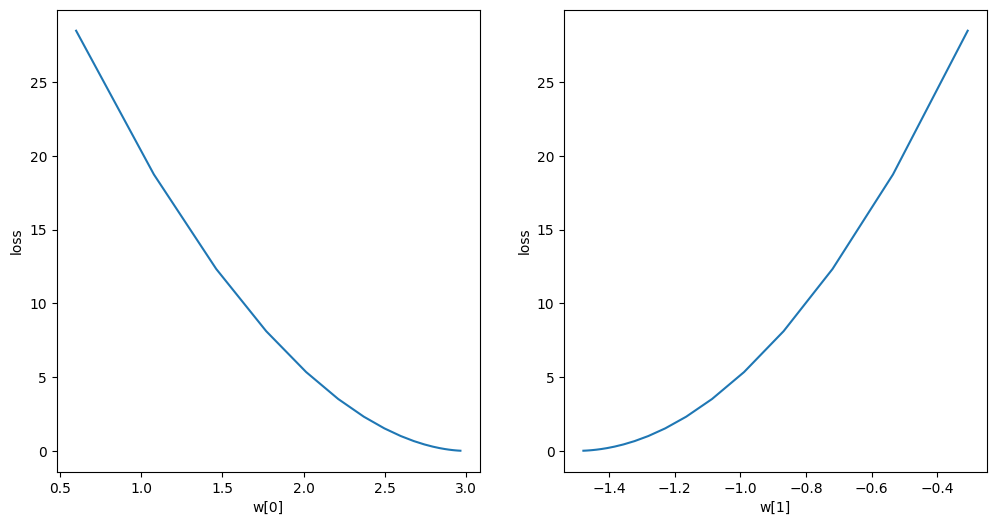

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.plot(w1_x, loss_y)
plt.xlabel('w[0]')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(w2_x, loss_y)
plt.xlabel('w[1]')
plt.ylabel('loss')

plt.show()

### Concise Implementation of Linear Regression
- API 사용해보기

In [54]:
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [55]:
def load_array(data_arrays, batch_size, is_train=True):
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [56]:
next(iter(data_iter))

[tensor([[ 1.4532,  1.0751],
         [ 0.4232, -2.3532],
         [ 0.6077,  0.2874],
         [-0.2612,  0.1268],
         [-0.4595, -0.0941],
         [-0.6805,  1.9493],
         [-0.4246,  1.0204],
         [ 0.9713,  0.9487],
         [-0.0865, -1.3350],
         [ 1.1220,  1.2365],
         [-0.6146, -0.0550],
         [-0.3973, -0.0730],
         [-0.0038, -0.3340],
         [ 0.0124,  0.9356],
         [ 0.0307,  1.8592],
         [ 1.4305, -0.0199],
         [ 0.0838, -1.6181],
         [-0.8797,  0.2497],
         [ 1.6107,  0.7989],
         [ 0.5760,  1.4013]]),
 tensor([[ 8.2591],
         [10.2919],
         [ 6.8890],
         [ 4.5286],
         [ 4.2820],
         [ 0.5450],
         [ 2.6879],
         [ 7.0055],
         [ 7.2455],
         [ 7.0046],
         [ 3.7478],
         [ 4.3999],
         [ 5.9901],
         [ 4.1253],
         [ 2.8182],
         [ 9.8309],
         [ 8.1845],
         [ 2.4795],
         [ 9.1169],
         [ 5.1326]])]

In [57]:
from torch import nn

net = nn.Sequential(nn.LazyLinear(1))

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [58]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([])

In [59]:
loss = nn.MSELoss()

In [60]:
trainer = torch.optim.SGD(net.parameters(), lr=0.01)

In [61]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X),y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.664898
epoch 2, loss 0.011555
epoch 3, loss 0.000309


In [62]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:', true_b - b)

error in estimating w: tensor([ 0.0077, -0.0008])
error in estimating b: tensor([0.0119])
